Load Libraries: We'll need to import pandas for data handling and os for navigating the file system.
Read Files: We will loop through the directory containing the CSV files, read each one, and modify the data accordingly.
Modify Data: Add a new column that captures the location extracted from the filename.

In [38]:
import pandas as pd
import os

# Define the directory containing the CSV files
directory_path = '../dataset'

# List to hold all the dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Extract location name by splitting on " 2014-" which is part of the date pattern in the filename
        location = filename.split(' 2014-')[0]
        
        # Add a new column for the location
        df['Location'] = location
        
        # Append the dataframe to the list
        dataframes.append(df)

# Optional: Combine all dataframes into a single dataframe if necessary
combined_df = pd.concat(dataframes, ignore_index=True)

# Show the combined dataframe
print(combined_df.head())


     datetime  temp  humidity  precipcover preciptype  windspeed  \
0  2014-01-01   3.2      58.0         0.00        NaN       15.6   
1  2014-01-02   2.0      82.6        29.17  rain,snow       17.6   
2  2014-01-03  -5.4      54.4        12.50  rain,snow       47.9   
3  2014-01-04  -3.8      53.2         0.00        NaN       20.9   
4  2014-01-05   2.8      79.1        20.83  rain,snow       17.0   

   sealevelpressure  cloudcover  solarradiation  solarenergy  ...  \
0            1027.0        66.2           117.6         10.2  ...   
1            1011.9        95.1            34.1          2.9  ...   
2            1021.9        39.5           126.7         10.9  ...   
3            1030.9        16.1           125.7         10.9  ...   
4            1020.0        97.5            24.0          1.9  ...   

   windspeed80  winddir80  windspeed100  winddir100  ghiradiation  \
0          0.0        NaN           0.0         NaN           NaN   
1          0.0        NaN           0.

In [39]:
combined_df.columns

Index(['datetime', 'temp', 'humidity', 'precipcover', 'preciptype',
       'windspeed', 'sealevelpressure', 'cloudcover', 'solarradiation',
       'solarenergy', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
       'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
       'windspeed50', 'winddir50', 'windspeed80', 'winddir80', 'windspeed100',
       'winddir100', 'ghiradiation', 'dniradiation', 'difradiation',
       'gtiradiation', 'sunelevation', 'Location'],
      dtype='object')

In [40]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame
# Display the number of missing values in each column
missing_values_count = combined_df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
datetime                0
temp                    0
humidity                0
precipcover             0
preciptype          20159
windspeed               0
sealevelpressure        0
cloudcover              0
solarradiation          0
solarenergy             0
soiltemp01           3662
soiltemp04           3662
soiltemp10           3662
soiltemp20           3662
soilmoisture01       3662
soilmoisture04       3662
soilmoisture10       3662
soilmoisture20       3662
windspeed50             0
winddir50            3640
windspeed80             0
winddir80            3640
windspeed100            0
winddir100           3640
ghiradiation         3640
dniradiation         3640
difradiation         3640
gtiradiation         3640
sunelevation            0
Location                0
dtype: int64


Based on the result of the missing value analysis, we'll proceed with the following steps:

Remove the preciptype column: Since this column has a substantial number of missing values and may not be critical for analyzing the impact of solar radiation on soil conditions.
Remove rows with missing values in the soil and wind-related columns: Given the significant count of missing values in soiltemp01, soiltemp04, soiltemp10, soiltemp20, soilmoisture01, soilmoisture04, soilmoisture10, soilmoisture20, winddir50, winddir80, winddir100, and gtiradiation, it's prudent to remove rows where any of these columns are missing to maintain data integrity for your analysis.

In [41]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame

# Remove 'preciptype' column
combined_df.drop('preciptype', axis=1, inplace=True)

# Define columns where NaN rows should be removed
columns_with_nan = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
                    'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
                    'winddir50', 'winddir80', 'winddir100', 'gtiradiation']

# Remove rows with NaN in any of the specified columns
combined_df.dropna(subset=columns_with_nan, inplace=True)

# Optionally, check the remaining missing values (if any)
remaining_missing_values = combined_df.isnull().sum()
print("Remaining missing values in each column:")
print(remaining_missing_values)

# Show the first few rows of the updated DataFrame
print(combined_df.head())


Remaining missing values in each column:
datetime            0
temp                0
humidity            0
precipcover         0
windspeed           0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
soiltemp01          0
soiltemp04          0
soiltemp10          0
soiltemp20          0
soilmoisture01      0
soilmoisture04      0
soilmoisture10      0
soilmoisture20      0
windspeed50         0
winddir50           0
windspeed80         0
winddir80           0
windspeed100        0
winddir100          0
ghiradiation        0
dniradiation        0
difradiation        0
gtiradiation        0
sunelevation        0
Location            0
dtype: int64
       datetime  temp  humidity  precipcover  windspeed  sealevelpressure  \
364  2014-12-31   0.5      44.6         0.00       20.3            1028.9   
365  2015-01-01   2.1      46.0         0.00       22.6            1021.7   
366  2015-01-02   4.8      53.0         0.00       14.2            1025.6   


In [42]:
combined_df.head()

,datetime,temp,humidity,precipcover,windspeed,sealevelpressure,cloudcover,solarradiation,solarenergy,soiltemp01,...,windspeed80,winddir80,windspeed100,winddir100,ghiradiation,dniradiation,difradiation,gtiradiation,sunelevation,Location
364,2014-12-31,0.5,44.6,0.00,20.3,1028.9,33.9,120.0,10.4,0.4,...,12.2,229.6,18.0,228.6,0.0,0.0,0.0,0.0,28.0,Arlington
365,2015-01-01,2.1,46.0,0.00,22.6,1021.7,36.5,116.2,10.0,0.4,...,19.8,229.2,31.3,229.4,116.0,92.0,81.0,116.0,28.1,Arlington
366,2015-01-02,4.8,53.0,0.00,14.2,1025.6,76.6,93.0,8.0,2.4,...,15.5,287.4,24.5,287.9,93.0,54.0,72.0,93.0,28.2,Arlington
367,2015-01-03,3.8,78.3,50.00,10.2,1029.1,94.5,13.6,1.2,1.3,...,14.4,100.0,20.9,99.9,14.0,0.0,6.0,6.0,28.3,Arlington
368,2015-01-04,11.7,78.2,41.67,32.4,1012.6,94.7,18.7,1.6,5.6,...,34.2,225.9,45.7,225.9,19.0,0.0,12.0,12.0,28.4,Arlington


In [43]:
df = combined_df.copy()

In [44]:
df.head()

,datetime,temp,humidity,precipcover,windspeed,sealevelpressure,cloudcover,solarradiation,solarenergy,soiltemp01,...,windspeed80,winddir80,windspeed100,winddir100,ghiradiation,dniradiation,difradiation,gtiradiation,sunelevation,Location
364,2014-12-31,0.5,44.6,0.00,20.3,1028.9,33.9,120.0,10.4,0.4,...,12.2,229.6,18.0,228.6,0.0,0.0,0.0,0.0,28.0,Arlington
365,2015-01-01,2.1,46.0,0.00,22.6,1021.7,36.5,116.2,10.0,0.4,...,19.8,229.2,31.3,229.4,116.0,92.0,81.0,116.0,28.1,Arlington
366,2015-01-02,4.8,53.0,0.00,14.2,1025.6,76.6,93.0,8.0,2.4,...,15.5,287.4,24.5,287.9,93.0,54.0,72.0,93.0,28.2,Arlington
367,2015-01-03,3.8,78.3,50.00,10.2,1029.1,94.5,13.6,1.2,1.3,...,14.4,100.0,20.9,99.9,14.0,0.0,6.0,6.0,28.3,Arlington
368,2015-01-04,11.7,78.2,41.67,32.4,1012.6,94.7,18.7,1.6,5.6,...,34.2,225.9,45.7,225.9,19.0,0.0,12.0,12.0,28.4,Arlington


In [45]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precipcover', 'windspeed',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
       'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
       'windspeed50', 'winddir50', 'windspeed80', 'winddir80', 'windspeed100',
       'winddir100', 'ghiradiation', 'dniradiation', 'difradiation',
       'gtiradiation', 'sunelevation', 'Location'],
      dtype='object')

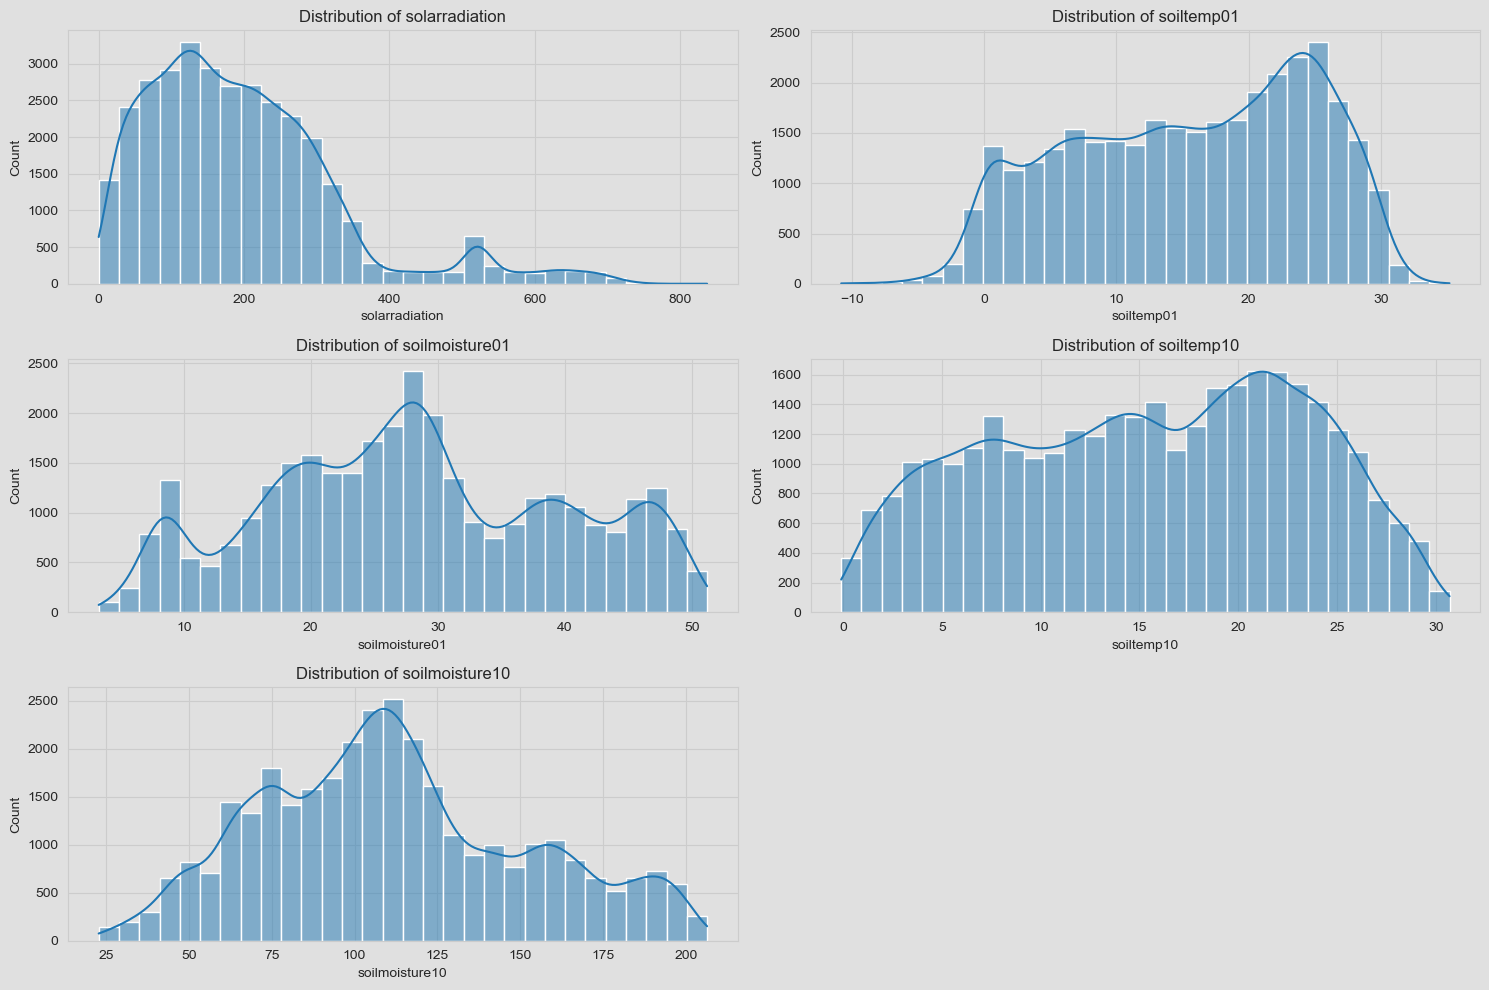

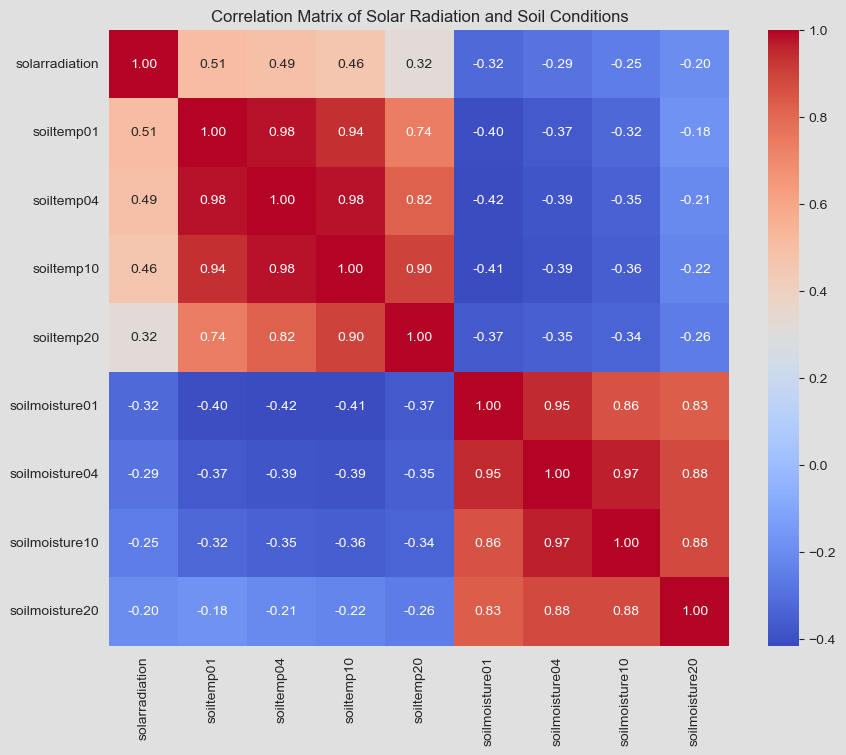

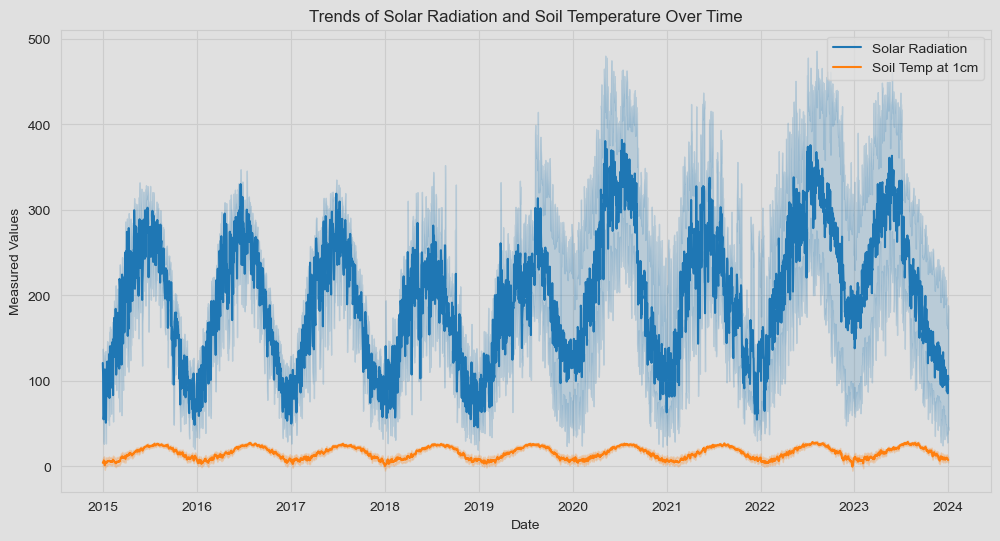

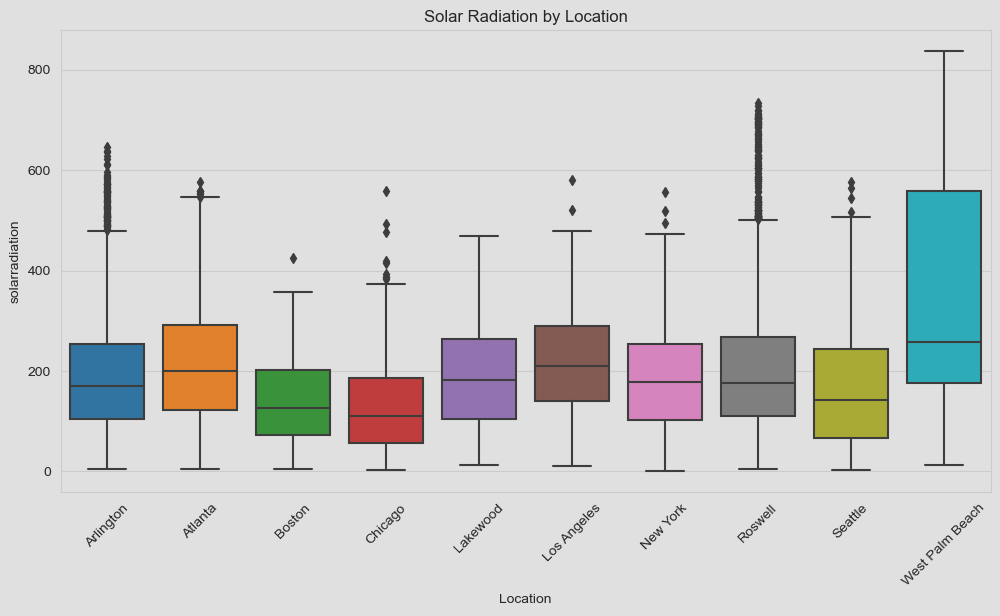

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid", {'axes.facecolor': '#E0E0E0', 'figure.facecolor': '#E0E0E0'})

# Convert 'datetime' from string to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# 1. Visualize Distribution of Key Variables
variables_to_plot = ['solarradiation', 'soiltemp01', 'soilmoisture01', 'soiltemp10', 'soilmoisture10']
plt.figure(figsize=(15, 10), facecolor='#E0E0E0', edgecolor='#E0E0E0')
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.savefig('../image/distribution_of_key_variables.png')
plt.show()

# 2. Correlation Analysis
correlation_vars = ['solarradiation', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']
correlation_matrix = df[correlation_vars].corr()
plt.figure(figsize=(10, 8), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Solar Radiation and Soil Conditions')
plt.savefig('../image/correlation_matrix.png')
plt.show()

# 3. Trend Analysis Over Time
plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.lineplot(x='datetime', y='solarradiation', data=df, label='Solar Radiation')
sns.lineplot(x='datetime', y='soiltemp01', data=df, label='Soil Temp at 1cm')
plt.title('Trends of Solar Radiation and Soil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Measured Values')
plt.legend()
plt.savefig('../image/trend_analysis_over_time.png')
plt.show()

# 4. Comparative Analysis by Location
plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.boxplot(x='Location', y='solarradiation', data=df)
plt.xticks(rotation=45)
plt.title('Solar Radiation by Location')
plt.savefig('../image/solar_radiation_by_location.png')
plt.show()


Modeling 

Step 1: Data Preparation
We need to ensure the dataset is ready for modeling. This includes handling missing values, feature selection, and splitting the dataset into training and testing subsets

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
# df = pd.read_csv('your_data.csv')  # Load data if not already loaded

# Convert 'datetime' from string to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Select relevant features
features = ['solarradiation', 'solarenergy', 'ghiradiation', 'dniradiation', 'difradiation', 'gtiradiation']
targets = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)


Step 2: Building the Machine Learning Models
We will build two models: a Random Forest regressor and a Gradient Boosting Machine model. These models will predict soil temperature and moisture.

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 1363.8636969539036


use a wrapper called MultiOutputRegressor that enables single-target regressors like GradientBoostingRegressor to be used as multi-target regressors. Here's how you can adjust your code to apply Gradient Boosting to your multi-target setup:

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Gradient Boosting Machine Model with MultiOutput Wrapper
gbm_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')


Gradient Boosting MSE: 1353.2953213557662


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Random Forest Metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest MAE: {rf_mae}')

# Gradient Boosting Metrics
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')
print(f'Gradient Boosting RMSE: {gbm_rmse}')
print(f'Gradient Boosting MAE: {gbm_mae}')


Random Forest MSE: 1363.8636969539036
Random Forest RMSE: 36.930525273192416
Random Forest MAE: 19.019004749454922
Gradient Boosting MSE: 1353.2953213557662
Gradient Boosting RMSE: 36.7871624531679
Gradient Boosting MAE: 19.62670304865015


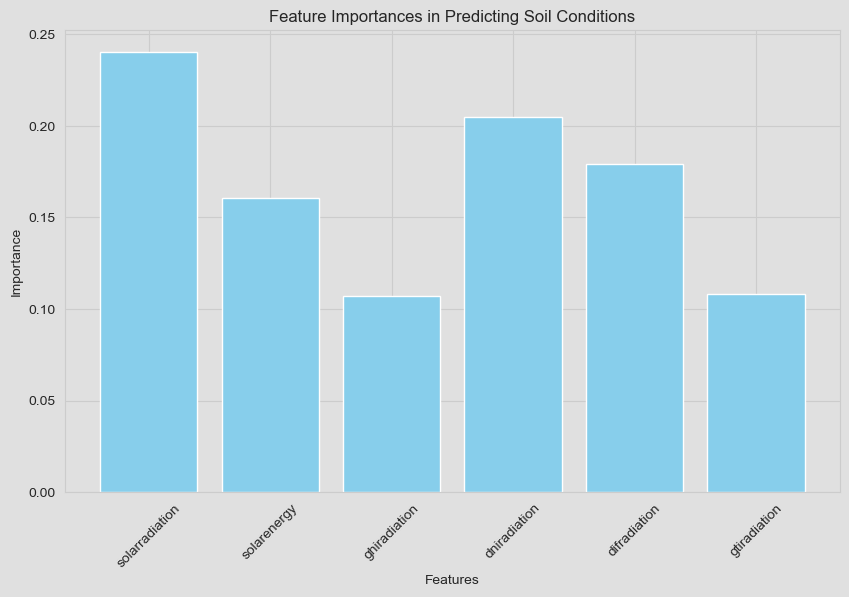

In [52]:
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model
feature_importances = rf_model.feature_importances_
features = ['solarradiation', 'solarenergy', 'ghiradiation', 'dniradiation', 'difradiation', 'gtiradiation']

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Predicting Soil Conditions')
plt.xticks(rotation=45)
plt.show()


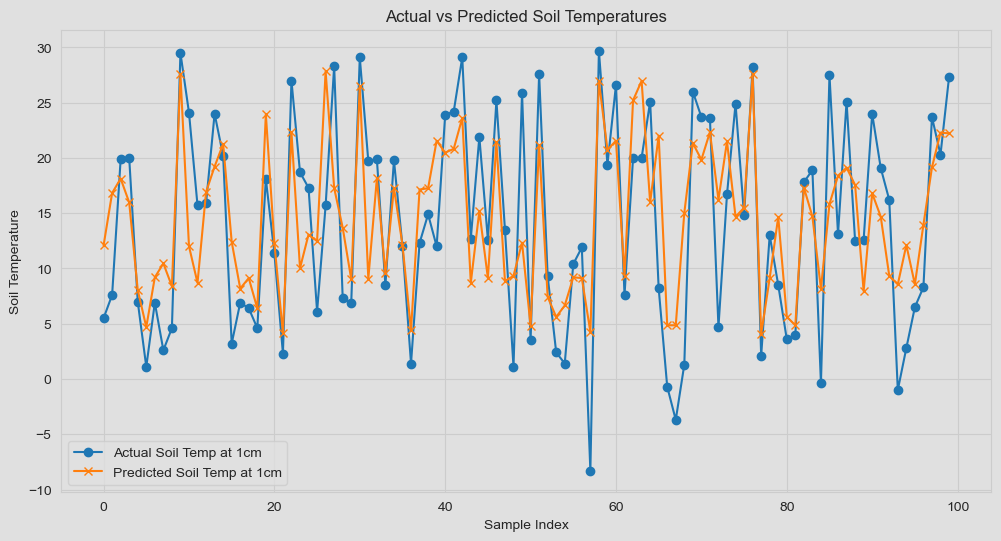

In [53]:
import matplotlib.pyplot as plt

# Assume gbm_predictions and y_test are available from your Gradient Boosting model
# Here, we plot the comparison for the first target, adjust indices as needed
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True).iloc[:100, 0], label='Actual Soil Temp at 1cm', marker='o')
plt.plot(gbm_predictions[:100, 0], label='Predicted Soil Temp at 1cm', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Soil Temperature')
plt.title('Actual vs Predicted Soil Temperatures')
plt.legend()
plt.show()


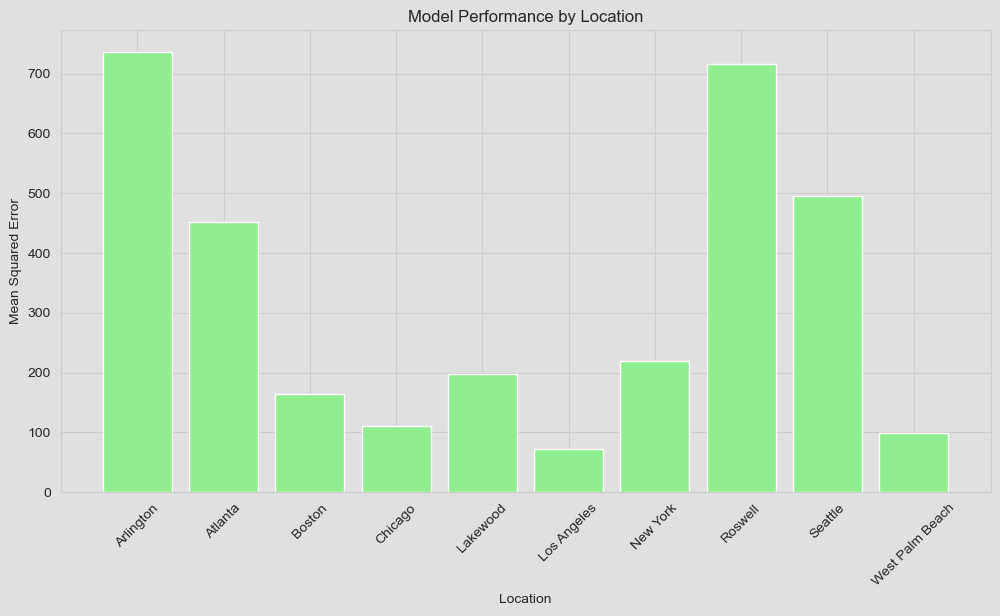

In [54]:
from sklearn.metrics import mean_squared_error

locations = df['Location'].unique()
mse_scores = {}

for location in locations:
    # Filter data by location
    location_data = df[df['Location'] == location]
    X_location = location_data[features]
    y_location = location_data[targets]

    # Split location-specific data
    X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_location, y_location, test_size=0.2, random_state=42)

    # Fit model (you can use an already tuned model or refit if necessary)
    rf_model.fit(X_train_loc, y_train_loc)
    predictions_loc = rf_model.predict(X_test_loc)

    # Calculate MSE for the location
    mse_scores[location] = mean_squared_error(y_test_loc, predictions_loc)

# Plotting MSE scores by location
plt.figure(figsize=(12, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance by Location')
plt.xticks(rotation=45)
plt.show()


Classification

Step 1: Define the Classification Target
For demonstration, let's classify days based on high vs. low solar radiation, which could influence various factors in soil conditions. We’ll create a binary target where days with solar radiation above the median are labeled 1 (high) and below the median as 0 (low).

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your loaded DataFrame
# Create a binary target based on the median of 'solarradiation'
median_solar_radiation = df['solarradiation'].median()
df['high_solar_radiation'] = (df['solarradiation'] >= median_solar_radiation).astype(int)

# Select features - consider location and other relevant environmental features
features = ['temp', 'humidity', 'precipcover', 'cloudcover', 'windspeed', 'sealevelpressure', 'Location']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encode categorical data
y = df['high_solar_radiation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Step 2: Train a Classification Model
Let’s use a Random Forest Classifier as it handles a mix of feature types and is robust to overfitting.

In [57]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))


Accuracy: 0.7920596288408883
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3335
           1       0.79      0.78      0.79      3239

    accuracy                           0.79      6574
   macro avg       0.79      0.79      0.79      6574
weighted avg       0.79      0.79      0.79      6574



In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(classification_report(y_test, lr_predictions))

# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print(f"Confusion Matrix for Logistic Regression:\n{lr_conf_matrix}")


Logistic Regression Accuracy: 0.7725889869181625
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3335
           1       0.76      0.79      0.77      3239

    accuracy                           0.77      6574
   macro avg       0.77      0.77      0.77      6574
weighted avg       0.77      0.77      0.77      6574

Confusion Matrix for Logistic Regression:
[[2505  830]
 [ 665 2574]]


In [59]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, rf_predictions))

# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print(f"Confusion Matrix for Random Forest:\n{rf_conf_matrix}")


Random Forest Accuracy: 0.7920596288408883
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3335
           1       0.79      0.78      0.79      3239

    accuracy                           0.79      6574
   macro avg       0.79      0.79      0.79      6574
weighted avg       0.79      0.79      0.79      6574

Confusion Matrix for Random Forest:
[[2667  668]
 [ 699 2540]]


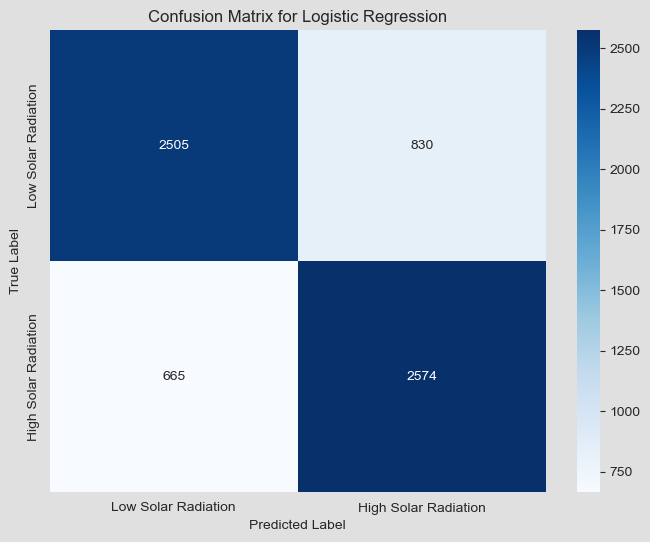

In [60]:
# Assume lr_predictions is available from the Logistic Regression model
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Solar Radiation', 'High Solar Radiation'], yticklabels=['Low Solar Radiation', 'High Solar Radiation'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


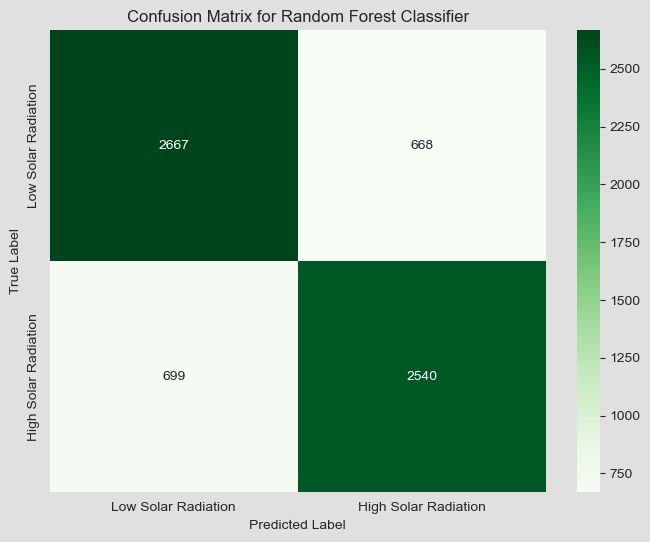

In [61]:
# Assume rf_predictions is available from the Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Low Solar Radiation', 'High Solar Radiation'], yticklabels=['Low Solar Radiation', 'High Solar Radiation'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Model Performance Summary:
1. Accuracy:
Random Forest: Achieved an accuracy of approximately 79.21%. This indicates a relatively high level of accuracy in classifying days as high or low solar radiation based on given features.
Logistic Regression: Showed slightly lower accuracy at about 77.26%. This suggests that while effective, it may not capture complex patterns as well as Random Forest.
2. Precision, Recall, and F1-Score:
Random Forest:
Precision (the ability of the classifier not to label a negative sample as positive): Both classes are very close, with 0.79 for both classes, suggesting good reliability in the positive predictive value.
Recall (the ability of the classifier to find all positive samples): Balanced as well, with 0.80 for class 0 and 0.78 for class 1, indicating a robust ability to classify all relevant instances correctly.
F1-Score (a weighted average of precision and recall): Equally balanced across both classes, showing an effective balance between precision and recall.
Logistic Regression:
Shows a slightly less balanced performance across metrics, with a marginal trade-off between precision and recall for the two classes. Still, the F1 scores are close, suggesting reasonable balance.
3. Confusion Matrix:
Random Forest: Shows a relatively balanced confusion matrix with higher true positives and true negatives, indicating fewer errors made by the model.
Logistic Regression: Displays a slightly higher number of false positives and false negatives compared to the Random Forest, indicating a less precise performance.

Effectiveness in Classification:

Both Random Forest and Logistic Regression are effective classifiers for this problem, with Random Forest slightly outperforming Logistic Regression in most metrics.
The high accuracy, along with balanced precision and recall, suggests that the features selected are good predictors for classifying solar radiation levels.
Model Choice:

Given its higher accuracy and balanced error metrics, Random Forest might be the preferred model for tasks requiring robust error handling and complex pattern recognition.
Logistic Regression, while slightly less accurate, provides a faster and simpler model that might be beneficial for larger datasets or real-time applications.
Implications for Solar Radiation and Soil Conditions:

The predictive ability of the models indicates a strong relationship between the selected features (like temperature, humidity, and cloud cover) and solar radiation levels, which indirectly affect soil conditions.
This relationship can be utilized for predictive maintenance in agricultural activities, optimizing conditions for crop growth, and studying environmental impacts.

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_df' is preprocessed and loaded with necessary columns
features = ['solarradiation', 'temp', 'humidity', 'windspeed', 'cloudcover']
target = 'soiltemp01'  # or 'soilmoisture01' depending on the model focus

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], combined_df[target], test_size=0.3, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1.5777757833891086
RMSE: 2.0861325615343054


In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'solar_radiation' is the feature and it is sequenced properly for time series forecasting
data = np.array(combined_df['solarradiation']).reshape(-1, 1)
n_steps = 3
X, y = [], []
for i in range(len(data) - n_steps):
    X.append(data[i:i + n_steps])
    y.append(data[i + n_steps])
X, y = np.array(X), np.array(y)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)


206/206 [==============================] - 1s 1ms/step
MSE: 3797.1442904738883


In [ ]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()

# Insert the training part of your model here

emissions = tracker.stop()
print(f"Estimated CO2 emissions for training: {emissions} kg")
